In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive

In [2]:
drive.mount('/content/gdriv')

Mounted at /content/gdriv


In [3]:
data_path = "/content/gdriv/My Drive/Colab Notebooks/data" 
data_name = os.listdir(data_path)
iris = pd.read_csv(data_path + '/' + data_name[0])
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**SepalLengthCm에 대한 종간 Box plot 그리기**

In [20]:
species = list(iris['Species'].value_counts().index)

# 종별 PetalLengthCm 차이 비교
data = []
for species_value in species:
  data.append(iris.loc[iris['Species']==species_value,'SepalLengthCm'])

print(data)

[100    6.3
101    5.8
102    7.1
103    6.3
104    6.5
105    7.6
106    4.9
107    7.3
108    6.7
109    7.2
110    6.5
111    6.4
112    6.8
113    5.7
114    5.8
115    6.4
116    6.5
117    7.7
118    7.7
119    6.0
120    6.9
121    5.6
122    7.7
123    6.3
124    6.7
125    7.2
126    6.2
127    6.1
128    6.4
129    7.2
130    7.4
131    7.9
132    6.4
133    6.3
134    6.1
135    7.7
136    6.3
137    6.4
138    6.0
139    6.9
140    6.7
141    6.9
142    5.8
143    6.8
144    6.7
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, dtype: float64, 0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
11    4.8
12    4.8
13    4.3
14    5.8
15    5.7
16    5.4
17    5.1
18    5.7
19    5.1
20    5.4
21    5.1
22    4.6
23    5.1
24    4.8
25    5.0
26    5.0
27    5.2
28    5.2
29    4.7
30    4.8
31    5.4
32    5.2
33    5.5
34    4.9
35    5.0
36    5.5
37    4.9
38    4.4
39    5.1
40    5.0
41

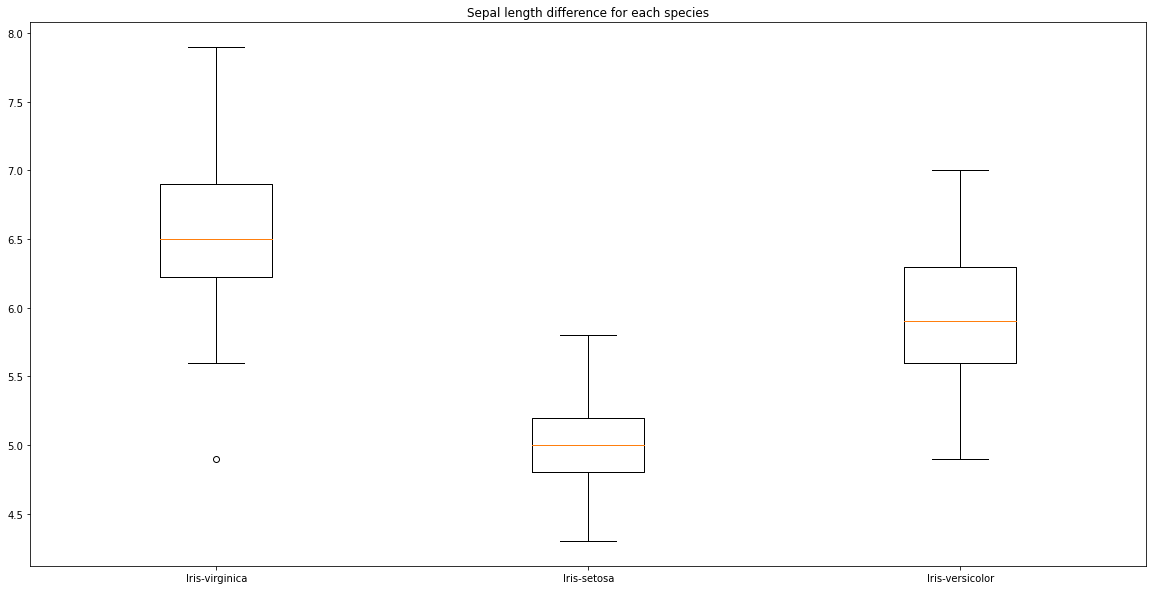

In [57]:
fig = plt.figure(figsize =(20, 10)) 
ax = fig.add_subplot(111) 
ax.set_xticklabels([species[0], species[1],species[2]])
plt.title("Sepal length difference for each species")
plt.boxplot(data)
plt.show()

**t-test를 통한 분석**

In [56]:
import scipy
print('Step1: 종별 데이터 분리')
species = iris['Species'].value_counts().index
print(species)
vir = iris.loc[iris['Species']==species[0],:]
ver = iris.loc[iris['Species']==species[1],:]
seto = iris.loc[iris['Species']==species[2],:]

Step1: 종별 데이터 분리
Index(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor'], dtype='object')


vir 과 seto 비교 (t-test)

In [33]:
diff = vir['SepalLengthCm'].mean() - seto['SepalLengthCm'].mean()
print(diff)
print('Step2-1: 꽃받침 길이의 평균 차이 검증(vir vs seto)')
statistic, p_value = scipy.stats.ttest_ind(vir['SepalLengthCm'],seto['SepalLengthCm'])
print("통계량: {}".format(statistic))

0.6519999999999984
Step2-1: 꽃받침 길이의 평균 차이 검증(vir vs seto)
통계량: 5.629165259719801


In [53]:
print('p-value: {}'.format(p_value))
if p_value < 0.05:
  print("vir의 sepal_length의 평균과 seto의 sepal_length의 평균은 차이가 있다.")
else:
  print("vir의 sepal_length의 평균과 seto의 sepal_length의 평균은 차이가 없다.")


p-value: 8.985235037487079e-18
vir의 sepal_length의 평균과 seto의 sepal_length의 평균은 차이가 있다.


In [52]:
statistic, p_value = scipy.stats.ttest_ind(ver['SepalLengthCm'],seto['SepalLengthCm'])
diff = vir['SepalLengthCm'].mean() - seto['SepalLengthCm'].mean()
print('통계량: {}'.format(statistic))
print('P value: {}'.format(p_value))
print('해석: vir의 꽃받침 길이와 seto의 꽃받침 길이의 평균 차이는 통계적으로 유의하며 vir의 꽃받침 길이의 평균이 {:2f} 만큼 크다.'.format(diff))


통계량: -10.52098626754911
P value: 8.985235037487079e-18
해석: vir의 꽃받침 길이와 seto의 꽃받침 길이의 평균 차이는 통계적으로 유의하며 vir의 꽃받침 길이의 평균이 0.652000 만큼 크다.


vir 과 ver 비교 (t-test)

In [41]:
diff = vir['SepalLengthCm'].mean() - ver['SepalLengthCm'].mean()
print(diff)
print('Step2-1: 꽃받침 길이의 평균 차이 검증(vir vs ver)')
statistic, p_value = scipy.stats.ttest_ind(vir['SepalLengthCm'],ver['SepalLengthCm'])
print("통계량: {}".format(statistic))

1.581999999999999
Step2-1: 꽃받침 길이의 평균 차이 검증(vir vs ver)
통계량: 15.386195820079404


In [42]:
print('p-value: {}'.format(p_value))
if p_value < 0.05:
  print("vir의 sepal_length의 평균과 ver의 sepal_length의 평균은 차이가 있다.")
else:
  print("vir의 sepal_length의 평균과 ver의 sepal_length의 평균은 차이가 없다.")


p-value: 6.892546060674059e-28
vir의 sepal_length의 평균과 ver의 sepal_length의 평균은 차이가 있다.


In [44]:
statistic, p_value = scipy.stats.ttest_ind(ver['SepalLengthCm'],seto['SepalLengthCm'])
diff = vir['SepalLengthCm'].mean() - ver['SepalLengthCm'].mean()
print('통계량: {}'.format(statistic))
print('P value: {}'.format(p_value))
print('해석: vir의 꽃받침 길이와 ver의 꽃받침 길이의 평균 차이는 통계적으로 유의하며 vir의 꽃받침 길이의 평균이 {:2f} 만큼 크다.'.format(diff))

통계량: -10.52098626754911
P value: 8.985235037487079e-18
해석: vir의 꽃받침 길이와 ver의 꽃받침 길이의 평균 차이는 통계적으로 유의하며 vir의 꽃받침 길이의 평균이 1.582000 만큼 크다.


ver 과 seto 비교 (t-test)

In [45]:
diff = ver['SepalLengthCm'].mean() - seto['SepalLengthCm'].mean()
print(diff)
print('Step2-1: 꽃받침 길이의 평균 차이 검증(vir vs ver)')
statistic, p_value = scipy.stats.ttest_ind(ver['SepalLengthCm'],seto['SepalLengthCm'])
print("통계량: {}".format(statistic))

-0.9300000000000006
Step2-1: 꽃받침 길이의 평균 차이 검증(vir vs ver)
통계량: -10.52098626754911


In [54]:
print('p-value: {}'.format(p_value))
if p_value < 0.05:
  print("ver의 sepal_length의 평균과 seto의 sepal_length의 평균은 차이가 있다.")
else:
  print("ver의 sepal_length의 평균과 seto의 sepal_length의 평균은 차이가 없다.")

p-value: 8.985235037487079e-18
ver의 sepal_length의 평균과 seto의 sepal_length의 평균은 차이가 있다.


In [55]:
statistic, p_value = scipy.stats.ttest_ind(ver['SepalLengthCm'],seto['SepalLengthCm'])
diff = ver['SepalLengthCm'].mean() - seto['SepalLengthCm'].mean()
print('통계량: {}'.format(statistic))
print('P value: {}'.format(p_value))
print('해석: ver의 꽃받침 길이와 seto의 꽃받침 길이의 평균 차이는 통계적으로 유의하며 ver의 꽃받침 길이의 평균이 {:2f} 만큼 크다.'.format(diff))

통계량: -10.52098626754911
P value: 8.985235037487079e-18
해석: ver의 꽃받침 길이와 seto의 꽃받침 길이의 평균 차이는 통계적으로 유의하며 ver의 꽃받침 길이의 평균이 -0.930000 만큼 크다.


**각 종에 SepalLengthCm과 SepalWidthCm 각 종별로 구분하고 산점도를 그리시오 **

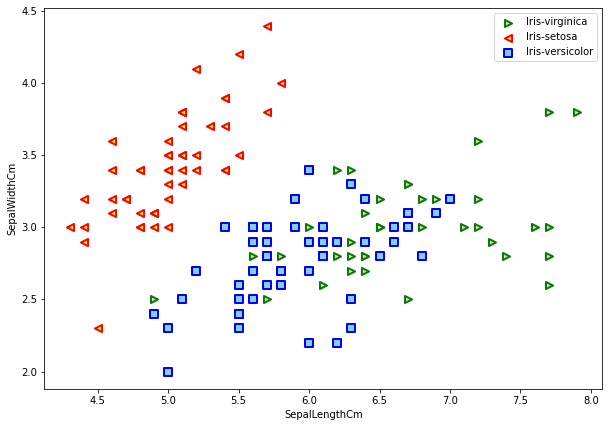

In [60]:
species = list(iris['Species'].value_counts().index)

# 종별 PetalLengthCm과 PetalWidthCm 산점도 차이 비교

data = []
labels = []
for species_value in species:
  data.append(iris.loc[iris['Species']==species_value,['SepalLengthCm','SepalWidthCm']])
  labels.append(species_value)


fig = plt.figure(figsize =(10, 7)) 
plt.scatter(data[0]['SepalLengthCm'], data[0]['SepalWidthCm'], c ="pink",  
            linewidths = 2,  
            marker =">",  
            edgecolor ="green",  
            s = 50) 
  
plt.scatter(data[1]['SepalLengthCm'], data[1]['SepalWidthCm'], c ="yellow", 
            linewidths = 2, 
            marker ="<",  
            edgecolor ="red",  
            s = 50) 

plt.scatter(data[2]['SepalLengthCm'], data[2]['SepalWidthCm'], c ="skyblue", 
            linewidths = 2, 
            marker ="s",  
            edgecolor ="blue",  
            s = 50) 

plt.xlabel("SepalLengthCm") 
plt.ylabel("SepalWidthCm") 
plt.legend(labels)
plt.show() 